In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime
import seaborn as sns

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import check_cv
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
Mar_cal = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-03-25/data/calendar.csv.gz")

In [3]:
print('The duration of calendar data is between {} and {}.'.format(Mar_cal['date'].min(), Mar_cal['date'].max()))

The duration of calendar data is between 2019-03-25 and 2020-03-23.


In [4]:
Mar_cal.shape[0]

3565685

In [5]:
Mar_cal.listing_id.nunique()

9769

In [6]:
Nov_cal = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-11-28/data/calendar.csv.gz")

In [7]:
Nov_cal.shape[0]

5023130

In [8]:
Nov_cal.listing_id.nunique()

13762

In [9]:
#Drop rows from "Nov_cal" that falls between 2019-11-28 and 2020-03-23

In [10]:
print('The duration of calendar data is between {} and {}.'.format(Nov_cal['date'].min(), Nov_cal['date'].max()))

The duration of calendar data is between 2019-11-28 and 2020-12-05.


In [11]:
end_date = '2020-03-23'
mask = (Nov_cal['date'] > end_date)
Nov_cal2 = Nov_cal.loc[mask]
Nov_cal2

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
208,35303,2020-03-24,f,"$4,200.00","$4,200.00",28.0,1125.0
209,35303,2020-03-25,f,"$4,200.00","$4,200.00",28.0,1125.0
210,35303,2020-03-26,f,"$4,200.00","$4,200.00",28.0,1125.0
211,35303,2020-03-27,f,"$4,200.00","$4,200.00",28.0,1125.0
212,35303,2020-03-28,f,"$4,200.00","$4,200.00",28.0,1125.0
...,...,...,...,...,...,...,...
5023125,40411222,2020-11-23,t,"$18,800.00","$18,800.00",1.0,1125.0
5023126,40411222,2020-11-24,t,"$18,800.00","$18,800.00",1.0,1125.0
5023127,40411222,2020-11-25,t,"$18,800.00","$18,800.00",1.0,1125.0
5023128,40411222,2020-11-26,t,"$18,800.00","$18,800.00",1.0,1125.0


In [12]:
print('The duration of calendar data is between {} and {}.'.format(Nov_cal2['date'].min(), Nov_cal2['date'].max()))

The duration of calendar data is between 2020-03-24 and 2020-12-05.


In [13]:
#Merge both calendar data from March 2019-November 2019 and November 2019-December 2020 (Mar_cal with Nov_cal2)

In [14]:
frame = [Mar_cal, Nov_cal2]
calendar = pd.concat(frame)
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,35303,2019-03-25,t,"$4,200.00","$4,200.00",28.0,1125.0
1,35303,2019-03-26,f,"$4,200.00","$4,200.00",28.0,1125.0
2,35303,2019-03-27,t,"$4,200.00","$4,200.00",28.0,1125.0
3,35303,2019-03-28,t,"$4,200.00","$4,200.00",28.0,1125.0
4,35303,2019-03-29,t,"$4,200.00","$4,200.00",28.0,1125.0
...,...,...,...,...,...,...,...
5023125,40411222,2020-11-23,t,"$18,800.00","$18,800.00",1.0,1125.0
5023126,40411222,2020-11-24,t,"$18,800.00","$18,800.00",1.0,1125.0
5023127,40411222,2020-11-25,t,"$18,800.00","$18,800.00",1.0,1125.0
5023128,40411222,2020-11-26,t,"$18,800.00","$18,800.00",1.0,1125.0


In [15]:
#Import listing data from March and November 2019-2020

In [16]:
Mar_listing = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-03-25/data/listings.csv.gz', 
                          low_memory = False)

In [17]:
pos = [61, 62]
colnames = Mar_listing.columns[pos]
print(colnames)

Index(['weekly_price', 'monthly_price'], dtype='object')


In [18]:
print('The duration of listing data is between {} and {}.'.format(Mar_listing['last_scraped'].min(), Mar_listing['last_scraped'].max()))

The duration of listing data is between 2019-03-25 and 2019-03-25.


In [19]:
Nov_listing = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-11-28/data/listings.csv.gz',
                          low_memory = False)

In [20]:
pos = [61, 62]
colnames = Nov_listing.columns[pos]
print(colnames)

Index(['weekly_price', 'monthly_price'], dtype='object')


In [21]:
print('The duration of listing data is between {} and {}.'.format(Nov_listing['last_scraped'].min(), Nov_listing['last_scraped'].max()))

The duration of listing data is between 2019-11-28 and 2019-12-07.


In [22]:
#Since listing data does not indicate dates booked, the 'last_scraped' date reflect the most recent listings as of date the data is pulled.
#Hence, unlike calendar data, we don't drop rows that fall between 2019-11-28 and 2020-03-23, for 2 reasons:
#1. We want to compare the same listings between 2019 with 2020
#2. There may be new listings added during this time.

In [23]:
#Merge both listing data (as of March 2019 and Dec 2019) for comparison and consistency with calendar data

In [24]:
frame2 = [Mar_listing, Nov_listing]
listing = pd.concat(frame2)
listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20190325164012,2019-03-25,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.20
1,197677,https://www.airbnb.com/rooms/197677,20190325164012,2019-03-25,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,1.68
2,289597,https://www.airbnb.com/rooms/289597,20190325164012,2019-03-25,Private apt in central Tokyo #203,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,1.27
3,370759,https://www.airbnb.com/rooms/370759,20190325164012,2019-03-25,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","Cozy and Relaxing, at home feeling in a reside...","So close to busy centers, yet so peaceful! Jus...",none,Peaceful and residential area just 10 mins awa...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.61
4,700253,https://www.airbnb.com/rooms/700253,20190325164012,2019-03-25,Private apt in central Tokyo #201,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.28
5,712350,https://www.airbnb.com/rooms/712350,20190325164012,2019-03-25,TOKYO LAI's HOUSE ITABASHI,LAI's HOUSE was located in a simple Japanese H...,"Hi, Thanks for your time. These is a Share Ap...",LAI's HOUSE was located in a simple Japanese H...,none,LAI's HOUSE are located in a Japanese Housing ...,...,f,f,strict_14_with_grace_period,f,f,4,4,0,0,0.92
6,776070,https://www.airbnb.com/rooms/776070,20190325164012,2019-03-25,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,"INTRO ε(*´･･`)зﾞHey""ε(´･･`*)з *TAKE NOTE* Jus...",We have been in airbnb since 2011 and it has g...,none,We love Nishinippori because is nearer to Toky...,...,t,f,moderate,t,t,1,0,1,0,2.70
7,872235,https://www.airbnb.com/rooms/872235,20190325164012,2019-03-25,RELAX AT HOME:Shimo 5'/Shibuya 10',"Monthly private fully furnished house, cozy an...",Nice LITTLE house with atmosphere in Tokyo. Be...,"Monthly private fully furnished house, cozy an...",none,It is a residential area and very quiet place ...,...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,0.57
8,899003,https://www.airbnb.com/rooms/899003,20190325164012,2019-03-25,"Classy room @Shinjuku, Takadanoba",..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,Walkable from Shinjuku station even if you mis...,..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,none,NaN,...,f,f,moderate,f,f,2,2,0,0,1.20
9,905944,https://www.airbnb.com/rooms/905944,20190325164012,2019-03-25,4F - Near Shinjuku & Shibuya w/Free WiFi,License M (Phone number hidden by Airbnb) Enti...,Welcome and thank you for reading the details ...,License M (Phone number hidden by Airbnb) Enti...,none,Hatagaya is a great neighborhood located 4 min...,...,t,f,strict_14_with_grace_period,f,f,7,6,1,0,2.27


In [25]:
listing.shape[0]

23531

In [26]:
listing.id.nunique()

15804

In [27]:
#Find number of listings that are both in March and November data
common = Mar_listing.merge(Nov_listing,on=['id'])
common.shape[0]

7727

In [28]:
#Find number of listings that are in March data but not in November data
Mar_listing[~Mar_listing.id.isin(common.id)].shape[0]

2042

In [29]:
#Find number of listings that are in November data but not in March data
Nov_listing[~Nov_listing.id.isin(common.id)].shape[0]

6035

In [30]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992357 entries, 0 to 5023129
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 426.8+ MB


In [31]:
listing.tail(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13752,40410952,https://www.airbnb.com/rooms/40410952,20191128233834,2019-11-29,#43★ 4Beds 신주쿠･가부키쵸중심★관광･쇼핑 편리한 위치★ 무료 포켓와이파이★,★도쿄의 중심 ､ 분주 한 신주쿠 ､ 풀 리모델링 !! ★최대인원 4명 !! 2...,내부를 전부 리모델링 했습니다. 모던한 일본식 숙소에서 편안한 여행이 되도록 서포...,★도쿄의 중심 ､ 분주 한 신주쿠 ､ 풀 리모델링 !! ★최대인원 4명 !! 2...,none,신주쿠에 있는 대형 쇼핑몰을 도보로 갈 수 있습니다. 주변 유명한 한국식당및 일본...,...,t,f,moderate,f,f,13,13,0,0,NaN
13753,40411222,https://www.airbnb.com/rooms/40411222,20191128233834,2019-11-29,#63★3Beds 신주쿠･가부키쵸중심★관광･쇼핑 편리한 위치★ 무료 포켓와이파이★,★도쿄의 중심 ､ 분주 한 신주쿠 ､ 풀 리모델링 !! ★최대인원 4명 !! 2...,내부를 전부 리모델링 했습니다. 모던한 일본식 숙소에서 편안한 여행이 되도록 서포...,★도쿄의 중심 ､ 분주 한 신주쿠 ､ 풀 리모델링 !! ★최대인원 4명 !! 2...,none,신주쿠에 있는 대형 쇼핑몰을 도보로 갈 수 있습니다. 주변 유명한 한국식당및 일본...,...,t,f,moderate,f,f,13,13,0,0,NaN
13754,40412075,https://www.airbnb.com/rooms/40412075,20191128233834,2019-11-29,新宿駅まで3分 東中野駅徒歩10分 最大6名 wifi #N3,東中野駅A1出口から徒歩5分ほど,NaN,東中野駅A1出口から徒歩5分ほど,none,NaN,...,t,f,flexible,f,f,6,6,0,0,NaN
13755,40412228,https://www.airbnb.com/rooms/40412228,20191128233834,2019-11-29,#2 【MONTHLY】 JAPAN TRAD APARTMENT IN ASAKUSA.,Recently built! Spacious! Great location! 2 fl...,【House Facility】 - Futon x 8 - Japanese foot w...,Recently built! Spacious! Great location! 2 fl...,none,The nearest station is Asakusa station. It is ...,...,f,f,strict_14_with_grace_period,f,f,28,28,0,0,NaN
13756,40412354,https://www.airbnb.com/rooms/40412354,20191128233834,2019-11-29,Shinjuku Simple Private Double Bed Room/Free WiFi,It is simple and reasonable private double bed...,-- Entire rented -- Non-smoking -- 1 Room -- K...,It is simple and reasonable private double bed...,none,"Lots of restaurants and enjoyable shops, so yo...",...,t,f,moderate,f,f,1,1,0,0,NaN
13757,40413103,https://www.airbnb.com/rooms/40413103,20191128233834,2019-11-29,【MONTHLY!】HOUSE IN ASAKUSA. SKY TREE! MAX 16 PP!,Recently built! Spacious! Great location! 2 st...,【House Facility】 - Futon x 16 - Japanese foot ...,Recently built! Spacious! Great location! 2 st...,none,The nearest station is Asakusa station. It is ...,...,f,f,strict_14_with_grace_period,f,f,28,28,0,0,NaN
13758,40413645,https://www.airbnb.com/rooms/40413645,20191128233834,2019-11-29,"3BR House, Easy access to Shinjuku/Shibuya Area!",Enjoy full access to your own 3 bedroom house ...,The house is larger than most Japanese size pl...,Enjoy full access to your own 3 bedroom house ...,none,Tabata station is an inspiring haven of creati...,...,t,f,flexible,f,f,16,16,0,0,NaN
13759,40415207,https://www.airbnb.com/rooms/40415207,20191128233834,2019-11-29,★SHEN HOUSE★COZY★E★supermarkets nearby★,★ The home stay is located in the living area ...,"★ 25 square meters, dedicated for urban living...",★ The home stay is located in the living area ...,none,★ Please do not make any noise in the room aft...,...,t,f,strict_14_with_grace_period,f,f,24,24,0,0,NaN
13760,40417564,https://www.airbnb.com/rooms/40417564,20191128233834,2019-11-29,池袋新宿渋谷､上野東京横浜直通赤羽民泊,赤羽岩淵駅徒歩30秒､赤羽駅徒歩5分,清潔､ｱｯﾄﾎｰﾑな雰囲気,赤羽岩淵駅徒歩30秒､赤羽駅徒歩5分 清潔､ｱｯﾄﾎｰﾑな雰囲気 365/24 TElMAI...,none,商店街至近､交通便利,...,t,f,moderate,f,f,1,1,0,0,NaN
13761,40422866,https://www.airbnb.com/rooms/40422866,20191128233834,2019-11-29,302西新宿五丁目車站步行4分鐘､近新宿鬧區､餐廳､超市､便利店､藥妝店､速食店､東京都廳及...,NaN,NaN,NaN,none,NaN,...,t,f,moderate,f,f,9,8,1,0,NaN


In [32]:
print(len(listing.columns))

106


In [33]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23531 entries, 0 to 13761
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 19.2+ MB


In [34]:
#Identify which columns from 'calendar' and 'listing' have mixed data types
list(calendar.select_dtypes(['object']).columns)

['date', 'available', 'price', 'adjusted_price']

In [35]:
list(listing.select_dtypes(['object']).columns)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'license',
 'instant_bookable',
 'is_business_travel_r

In [36]:
#Change all price variables to float and remove $ sign
calendar["price"] = calendar["price"].str.replace("[$, ]", "").astype(float)
calendar["adjusted_price"] = calendar["adjusted_price"].str.replace("[$, ]", "").astype(float)

In [37]:
calendar.dtypes

listing_id          int64
date               object
available          object
price             float64
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtype: object

In [38]:
listing['price'] = listing['price'].str.replace("[$, ]", "").astype(float)
listing['weekly_price'] = listing['weekly_price'].str.replace("[$, ]", "").astype(float)
listing['monthly_price'] = listing['monthly_price'].str.replace("[$, ]", "").astype(float)

In [39]:
list(listing.select_dtypes(['float']).columns)

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'jurisdiction_names',
 'reviews_per_month']

In [40]:
#Find out insights on prices from 'calendar' prior to data processing
print('The maximum price is {}.'.format(calendar['price'].max()))
print('The minimum price is {}.'.format(calendar['price'].min()))
print('The average price is {}.'.format(calendar['price'].mean()))

The maximum price is 13109645.0.
The minimum price is 400.0.
The average price is 24166.113320418175.


In [41]:
print('The maximum adj_price is {}.'.format(calendar['adjusted_price'].max()))
print('The minimum adj_price is {}.'.format(calendar['adjusted_price'].min()))
print('The average adj_price is {}.'.format(calendar['adjusted_price'].mean()))

The maximum adj_price is 13109645.0.
The minimum adj_price is 350.0.
The average adj_price is 24140.756782709996.


In [42]:
#Find out insights on prices from 'listing' prior to data processing
print('The maximum price is {}.'.format(listing['price'].max()))
print('The minimum price is {}.'.format(listing['price'].min()))
print('The average price is {}.'.format(listing['price'].mean()))

The maximum price is 1063900.0.
The minimum price is 0.0.
The average price is 17328.215290467895.


In [43]:
print('The maximum price is {}.'.format(listing['weekly_price'].max()))
print('The minimum price is {}.'.format(listing['weekly_price'].min()))
print('The average price is {}.'.format(listing['weekly_price'].mean()))

The maximum price is 4016907.0.
The minimum price is 280.0.
The average price is 83412.21307506053.


In [44]:
print('The maximum price is {}.'.format(listing['monthly_price'].max()))
print('The minimum price is {}.'.format(listing['monthly_price'].min()))
print('The average price is {}.'.format(listing['monthly_price'].mean()))

The maximum price is 82462361.0.
The minimum price is 540.0.
The average price is 772509.8415300547.


In [45]:
#The maximum prices all seem to be outliers. We'll solve this problem in a few moments.
#Check for missing values.
calendar.isnull().sum()

listing_id          0
date                0
available           0
price             572
adjusted_price    572
minimum_nights      0
maximum_nights      0
dtype: int64

In [46]:
listing.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3319
Length: 106, dtype: int64

In [47]:
null_cols = [i for i in calendar.columns if calendar[i].isnull().any()]
null_cols

['price', 'adjusted_price']

In [48]:
null_cols2 = [j for j in listing.columns if listing[j].isnull().any()]
null_cols2

['summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'jurisdiction_names',
 'reviews_per_month']

In [49]:
#Drop rows with prices equal to zero from 'listing'
(listing['price']!=0).sum()
mask2 = (listing['price'] != 0)
listing_new = listing.loc[mask2]
listing_new

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20190325164012,2019-03-25,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.20
1,197677,https://www.airbnb.com/rooms/197677,20190325164012,2019-03-25,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,1.68
2,289597,https://www.airbnb.com/rooms/289597,20190325164012,2019-03-25,Private apt in central Tokyo #203,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,1.27
3,370759,https://www.airbnb.com/rooms/370759,20190325164012,2019-03-25,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","Cozy and Relaxing, at home feeling in a reside...","So close to busy centers, yet so peaceful! Jus...",none,Peaceful and residential area just 10 mins awa...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.61
4,700253,https://www.airbnb.com/rooms/700253,20190325164012,2019-03-25,Private apt in central Tokyo #201,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13757,40413103,https://www.airbnb.com/rooms/40413103,20191128233834,2019-11-29,【MONTHLY!】HOUSE IN ASAKUSA. SKY TREE! MAX 16 PP!,Recently built! Spacious! Great location! 2 st...,【House Facility】 - Futon x 16 - Japanese foot ...,Recently built! Spacious! Great location! 2 st...,none,The nearest station is Asakusa station. It is ...,...,f,f,strict_14_with_grace_period,f,f,28,28,0,0,NaN
13758,40413645,https://www.airbnb.com/rooms/40413645,20191128233834,2019-11-29,"3BR House, Easy access to Shinjuku/Shibuya Area!",Enjoy full access to your own 3 bedroom house ...,The house is larger than most Japanese size pl...,Enjoy full access to your own 3 bedroom house ...,none,Tabata station is an inspiring haven of creati...,...,t,f,flexible,f,f,16,16,0,0,NaN
13759,40415207,https://www.airbnb.com/rooms/40415207,20191128233834,2019-11-29,★SHEN HOUSE★COZY★E★supermarkets nearby★,★ The home stay is located in the living area ...,"★ 25 square meters, dedicated for urban living...",★ The home stay is located in the living area ...,none,★ Please do not make any noise in the room aft...,...,t,f,strict_14_with_grace_period,f,f,24,24,0,0,NaN
13760,40417564,https://www.airbnb.com/rooms/40417564,20191128233834,2019-11-29,池袋新宿渋谷､上野東京横浜直通赤羽民泊,赤羽岩淵駅徒歩30秒､赤羽駅徒歩5分,清潔､ｱｯﾄﾎｰﾑな雰囲気,赤羽岩淵駅徒歩30秒､赤羽駅徒歩5分 清潔､ｱｯﾄﾎｰﾑな雰囲気 365/24 TElMAI...,none,商店街至近､交通便利,...,t,f,moderate,f,f,1,1,0,0,NaN


In [50]:
#Check for missing values in price variables in 'calendar' and 'listing'
calendar['price'].isnull().sum()

572

In [51]:
calendar['adjusted_price'].isnull().sum()

572

In [52]:
listing['weekly_price'].isnull().sum()

23118

In [53]:
listing['monthly_price'].isnull().sum()

23165

In [54]:
listing['beds'].isnull().sum()

7

In [55]:
listing['square_feet'].isnull().sum()

23509

In [56]:
listing['price'].isnull().sum()

0

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


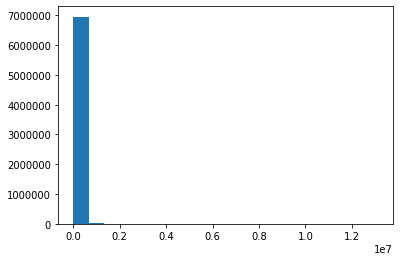

In [57]:
plt.hist(calendar['price'], bins=20);

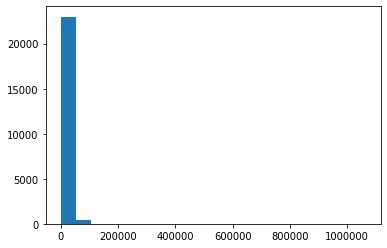

In [58]:
plt.hist(listing['price'], bins=20);

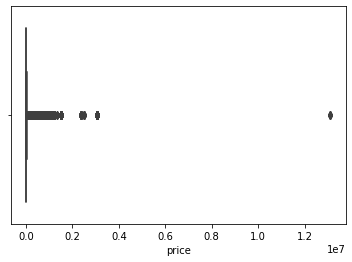

In [59]:
sns.boxplot(x=calendar['price'])

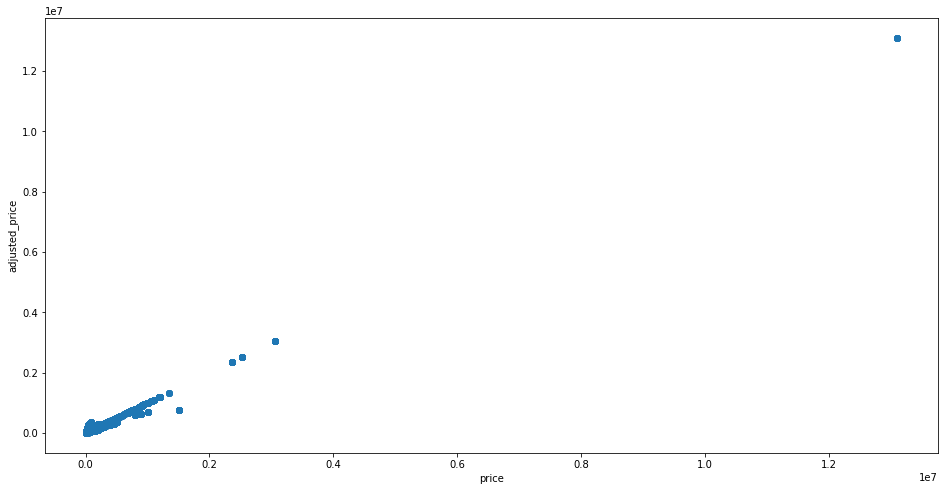

In [60]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(calendar['price'], calendar['adjusted_price'])
ax.set_xlabel('price')
ax.set_ylabel('adjusted_price')
plt.show()

In [61]:
# The maximum price looks like an outlier. Therefore, we'll drop outliers.
# One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.
# Computing IQR
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

12500.0


In [62]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
calendar_new = calendar.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

In [63]:
calendar_new.shape[0]

6319261

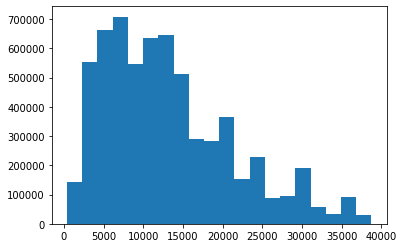

In [64]:
plt.hist(calendar_new['price'], bins = 20);

In [65]:
#Price in new_calendar is skewed to the right.

In [66]:
calendar_new['price'].isnull().sum()

0

In [70]:
min_nights = np.where(calendar_new['minimum_nights'] == 0)[0]
min_nights

array([], dtype=int64)

In [71]:
print('The maximum number of nights is {}.'.format(calendar_new['maximum_nights'].max()))
print('The minimum number of nights is {}.'.format(calendar_new['maximum_nights'].min()))
print('The average number of nights is {}.'.format(calendar_new['maximum_nights'].mean()))

The maximum number of nights is 3000.0.
The minimum number of nights is 1.0.
The average number of nights is 731.2337974329594.


In [72]:
max_nights = np.where(calendar_new['maximum_nights'] > 180)[0]
max_nights

array([      0,       1,       2, ..., 6319258, 6319259, 6319260])

In [73]:
#Drop rows where maximum nights is more than 180 nights (6 months)#

max_nights = 181
mask3 = (calendar_new['maximum_nights'] < max_nights)
new_calendar = calendar_new[mask3]
new_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
730,289597,2019-03-25,f,4508.0,4508.0,30.0,180.0
731,289597,2019-03-26,f,4508.0,4508.0,30.0,180.0
732,289597,2019-03-27,f,4508.0,4508.0,30.0,180.0
733,289597,2019-03-28,f,4508.0,4508.0,30.0,180.0
734,289597,2019-03-29,f,4508.0,4508.0,30.0,180.0
...,...,...,...,...,...,...,...
5020205,40408489,2020-11-23,t,18800.0,18800.0,1.0,99.0
5020206,40408489,2020-11-24,t,18800.0,18800.0,1.0,99.0
5020207,40408489,2020-11-25,t,18800.0,18800.0,1.0,99.0
5020208,40408489,2020-11-26,t,18800.0,18800.0,1.0,99.0


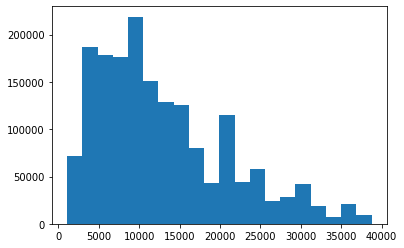

In [74]:
plt.hist(new_calendar['price'], bins = 20);

In [79]:
print(min(listing['price']))

0.0


In [80]:
# Find percentage of missing values in each column in Listing dataset
listing_missing_df = listing.isnull().mean()*100
listing_missing_df
# Filter out only the columns with missing values, showing the percentage of missing values in each column.
listing_nan_cols = listing_missing_df[listing_missing_df > 0]
listing_nan_cols

summary                           1.007182
space                            12.783137
description                       0.862692
neighborhood_overview            20.721601
notes                            24.695083
transit                          15.643194
access                           26.785942
interaction                      24.053376
house_rules                      40.669755
thumbnail_url                   100.000000
medium_url                      100.000000
xl_picture_url                  100.000000
host_name                         0.046747
host_since                        0.046747
host_location                     0.089244
host_about                       27.822872
host_response_time                2.885555
host_response_rate                2.885555
host_acceptance_rate            100.000000
host_is_superhost                 0.046747
host_thumbnail_url                0.046747
host_picture_url                  0.046747
host_neighbourhood               13.203859
host_listin

In [81]:
# Drop columns with null values of 12% and above (mostly listing descriptions data), except review scores data:
# The columns to drop are thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, 
#neighbourhood_group_cleansed, jurisdiction_names, square_feet, weekly_price, monthly_price, house_rules,
#host_about, access, interaction, notes, neighborhood_overview, transit, host_neighborhood, space
null_cols_to_drop = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 
                     'neighbourhood_group_cleansed', 'jurisdiction_names', 'square_feet', 'weekly_price', 
                     'monthly_price', 'house_rules', 'host_about', 'access', 'interaction', 'notes', 
                     'neighborhood_overview', 'transit', 'host_neighbourhood', 'space']
listing_new = listing.drop(null_cols_to_drop, axis=1)
listing_new.dropna(inplace=True)
listing_new.shape[0]
listing_new.head()

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3,370759,https://www.airbnb.com/rooms/370759,20190325164012,2019-03-25,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","So close to busy centers, yet so peaceful! Jus...",none,https://a0.muscache.com/im/pictures/5533aeaa-9...,1573631,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.61
5,712350,https://www.airbnb.com/rooms/712350,20190325164012,2019-03-25,TOKYO LAI's HOUSE ITABASHI,LAI's HOUSE was located in a simple Japanese H...,LAI's HOUSE was located in a simple Japanese H...,none,https://a0.muscache.com/im/pictures/cd0353eb-8...,3667176,...,f,f,strict_14_with_grace_period,f,f,4,4,0,0,0.92
7,872235,https://www.airbnb.com/rooms/872235,20190325164012,2019-03-25,RELAX AT HOME:Shimo 5'/Shibuya 10',"Monthly private fully furnished house, cozy an...","Monthly private fully furnished house, cozy an...",none,https://a0.muscache.com/im/pictures/05c55866-8...,1573631,...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,0.57
8,899003,https://www.airbnb.com/rooms/899003,20190325164012,2019-03-25,"Classy room @Shinjuku, Takadanoba",..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,none,https://a0.muscache.com/im/pictures/20005274/1...,4799233,...,f,f,moderate,f,f,2,2,0,0,1.20
9,905944,https://www.airbnb.com/rooms/905944,20190325164012,2019-03-25,4F - Near Shinjuku & Shibuya w/Free WiFi,License M (Phone number hidden by Airbnb) Enti...,License M (Phone number hidden by Airbnb) Enti...,none,https://a0.muscache.com/im/pictures/16480116/b...,4847803,...,t,f,strict_14_with_grace_period,f,f,7,6,1,0,2.27


In [82]:
#Find out where z-score > 3 for Price for Listing_new dataset. Formula shows which rows have outlier prices.
#z = np.abs(stats.zscore(listing_new['price']))
#threshold = 3
#print(np.where(z > 3))

In [83]:
print('The maximum price is {}.'.format(listing_new['price'].max()))
print('The minimum price is {}.'.format(listing_new['price'].min()))
print('The average price is {}.'.format(listing_new['price'].mean()))

The maximum price is 999994.0.
The minimum price is 0.0.
The average price is 18674.39296822177.


In [84]:
# The maximum price looks like an outlier. Therefore, we'll drop outliers.
# One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.
# Computing IQR
Q1 = listing['price'].quantile(0.25)
Q3 = listing['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11467.0


In [85]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
listing_new = listing.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
listing_new.shape[0]

21901

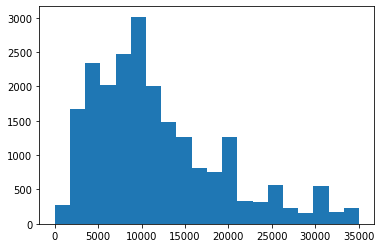

In [86]:
plt.hist(listing_new['price'], bins=20);

In [90]:
# Explore new_calendar dataframe
print('The number of available listings in the calendar is {}'.
      format(new_calendar[new_calendar['available'] == 't']['available'].count()))
print('The number of not available listings in the calendar is {}'.
      format(new_calendar[new_calendar['available'] == 'f']['available'].count()))

The number of available listings in the calendar is 558155
The number of not available listings in the calendar is 1167413


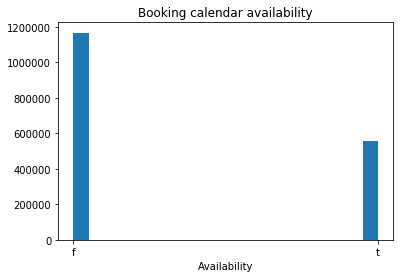

In [91]:
plt.figure()
plt.hist(new_calendar['available'], bins=20)
plt.xlabel('Availability')
plt.title('Booking calendar availability');

In [92]:
print('The calendar duration is between {} and {}.'.format(new_calendar['date'].min(), new_calendar['date'].max()))

The calendar duration is between 2019-03-25 and 2020-12-05.


In [93]:
# Create a column that corresponds t/f value in the available column
new_calendar['available_t'] = new_calendar['available'].apply(lambda x: 1 if x == 't' else 0)
new_calendar['available_f'] = new_calendar['available'].apply(lambda x: 1 if x == 'f' else 0)
new_calendar['available_total'] = new_calendar['available'].apply(lambda x: 1 if x == 'f' else 1)
new_calendar.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,available_t,available_f,available_total
730,289597,2019-03-25,f,4508.0,4508.0,30.0,180.0,0,1,1
731,289597,2019-03-26,f,4508.0,4508.0,30.0,180.0,0,1,1
732,289597,2019-03-27,f,4508.0,4508.0,30.0,180.0,0,1,1
733,289597,2019-03-28,f,4508.0,4508.0,30.0,180.0,0,1,1
734,289597,2019-03-29,f,4508.0,4508.0,30.0,180.0,0,1,1


In [94]:
# Change dtype of date column to datetime
new_calendar['date'] = pd.to_datetime(new_calendar['date'])
new_calendar['date'].head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


730   2019-03-25
731   2019-03-26
732   2019-03-27
733   2019-03-28
734   2019-03-29
Name: date, dtype: datetime64[ns]

In [95]:
# Set index for availability to find occupancy rate by month and year
df_m = new_calendar[['available_t','available_f', 'available_total', 'date']].set_index(new_calendar['date'])
df_m = df_m.set_index([df_m.index.year, df_m.index.month, df_m.index])
df_m.index.names = ['year', 'month', 'date']
df_sum = df_m.sum(level=['year', 'month'])
df_sum['occupancy rate'] = df_m['available_f'].mean(level=['year', 'month'])
df_sum = df_sum.reset_index()

In [96]:
# Create a date column that has the year and the date, e.g.'20XX-XX'
df_sum['year'] = df_sum['year'].astype('str')
df_sum['month'] = df_sum['month'].astype('str')
df_sum['date'] = df_sum['year'].str.cat(df_sum['month'], sep='-')

In [97]:
# set index for price to find mean price by month and year 
df_p = new_calendar[['price','adjusted_price', 'date', 'minimum_nights']].set_index(new_calendar['date'])
df_p = df_p.set_index([df_p.index.year, df_p.index.month, df_p.index])
df_p.index.names = ['year', 'month', 'date']
df_ave_p = df_p.mean(level=['year', 'month'])
df_ave_p = df_ave_p.reset_index()

In [98]:
#Output 'Average price' dataframe summarizes the price, adjusted price and min_nights for each month of booking
df_ave_p

,year,month,price,adjusted_price,minimum_nights
0,2019,3,12941.906888,12967.793239,2.654667
1,2019,4,12956.009183,13027.315184,2.570167
2,2019,5,12603.908755,12603.370424,2.650586
3,2019,6,12477.098705,12449.285941,2.752120
4,2019,7,12967.581192,13052.767401,2.746363
5,2019,8,13181.220045,13207.585212,2.765258
6,2019,9,12839.066341,12813.241847,2.800109
7,2019,10,13019.388666,13077.009015,2.767564
8,2019,11,13084.907625,13050.181217,2.821600
9,2019,12,12973.987208,13002.324013,2.807114


In [99]:
# Create a date column in 'df_ave_p' that has the year and the date, e.g.'20XX-XX'
df_ave_p['year'] = df_ave_p['year'].astype('str')
df_ave_p['month'] = df_ave_p['month'].astype('str')
df_ave_p['date'] = df_ave_p['year'].str.cat(df_ave_p['month'], sep='-')
df_ave_p['date'].head()

0    2019-3
1    2019-4
2    2019-5
3    2019-6
4    2019-7
Name: date, dtype: object

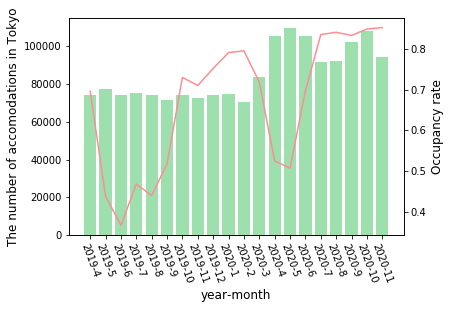

In [100]:
# Create a figure, omitting March 2019 and December 2020 since some dates are missing
fig, ax1 = plt.subplots()
plt.xticks(rotation=-70)
ax2 = ax1.twinx()
ax1.bar(df_sum['date'].iloc[1:-1], df_sum['available_total'].iloc[1:-1], color="#9DE0AD")
ax2.plot(df_sum['date'].iloc[1:-1], df_sum['occupancy rate'].iloc[1:-1], color="#FF8C94")
ax1.set_xlabel('year-month', fontsize = 12)
ax1.set_ylabel('The number of accomodations in Tokyo', fontsize = 12)
ax2.set_ylabel('Occupancy rate', fontsize = 12);

In [101]:
#The number of accommodations in Tokyo, in green have increased significantly within 1 year - 
#we're only looking at bookings with max_nights of 180, since we're only considering short-term rentals
#as defined by most jurisdictions on Airbnb in the world.
mask = (df_ave_p['date'] >= '2019-4') & (df_ave_p['date'] <= '2019-6')
presummer2019 = df_ave_p.loc[mask]
presummer2019.head()

,year,month,price,adjusted_price,minimum_nights,date
1,2019,4,12956.009183,13027.315184,2.570167,2019-4
2,2019,5,12603.908755,12603.370424,2.650586,2019-5
3,2019,6,12477.098705,12449.285941,2.752120,2019-6


In [102]:
mask2 = (df_ave_p['date'] >= '2020-4') & (df_ave_p['date'] <= '2020-6')
presummer2020 = df_ave_p.loc[mask2]
presummer2020.head()

,year,month,price,adjusted_price,minimum_nights,date
13,2020,4,13446.690325,13575.481044,2.535250,2020-4
14,2020,5,12932.179853,12968.009169,2.531429,2020-5
15,2020,6,12837.880280,12845.638553,2.539391,2020-6


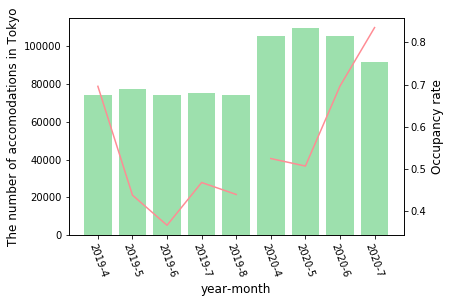

In [103]:
#Compare no. of bookings between April-August 2019 vs 2020
#August-Nov 2019 vs 2020.
fig, ax1 = plt.subplots()
plt.xticks(rotation=-70)
ax2 = ax1.twinx()
ax1.bar(df_sum['date'].iloc[1:6], df_sum['available_total'].iloc[1:6],color="#9DE0AD")
ax1.bar(df_sum['date'].iloc[13:17], df_sum['available_total'].iloc[13:17],color="#9DE0AD")
ax2.plot(df_sum['date'].iloc[1:6], df_sum['occupancy rate'].iloc[1:6],color="#FF8C94")
ax2.plot(df_sum['date'].iloc[13:17], df_sum['occupancy rate'].iloc[13:17],color="#FF8C94")
ax1.set_xlabel('year-month', fontsize = 12)
ax1.set_ylabel('The number of accomodations in Tokyo', fontsize = 12)
ax2.set_ylabel('Occupancy rate', fontsize = 12);

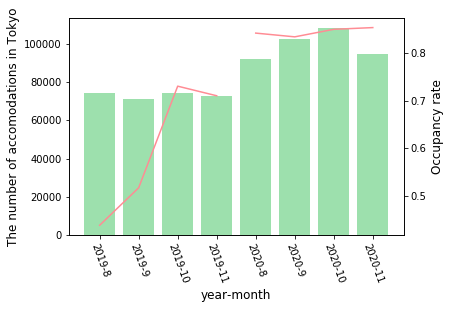

In [104]:
#Compare no. of bookings between August-Nov 2019 vs 2020.
fig, ax1 = plt.subplots()
plt.xticks(rotation=-70)
ax2 = ax1.twinx()
ax1.bar(df_sum['date'].iloc[5:9], df_sum['available_total'].iloc[5:9],color="#9DE0AD")
ax1.bar(df_sum['date'].iloc[17:-1], df_sum['available_total'].iloc[17:-1],color="#9DE0AD")
ax2.plot(df_sum['date'].iloc[5:9], df_sum['occupancy rate'].iloc[5:9],color="#FF8C94")
ax2.plot(df_sum['date'].iloc[17:-1], df_sum['occupancy rate'].iloc[17:-1],color="#FF8C94")
ax1.set_xlabel('year-month', fontsize = 12)
ax1.set_ylabel('The number of accomodations in Tokyo', fontsize = 12)
ax2.set_ylabel('Occupancy rate', fontsize = 12);

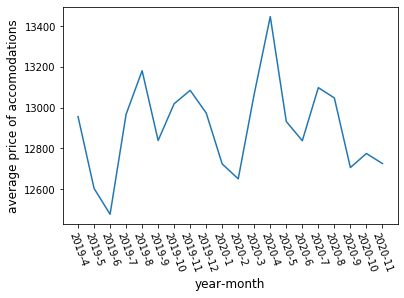

In [105]:
plt.plot(df_ave_p['date'].iloc[1:-1], df_ave_p['price'].iloc[1:-1])
plt.xticks(rotation=-70)
plt.xlabel('year-month', fontsize=12)
plt.ylabel('average price of accomodations', fontsize=12);

In [106]:
#Graph shows consistent patterns of price increases in April each year and increases every July and only in October 2019. 
#Graph peaks the highest in April 2020, and also increased in July and again in October 2020, although at a lower price 
#compared to the same time last year. Please note this data is pulled prior to the now pandemic outbreak in Japan. 
#Hence, travel plans back then (end of January) may not have been modified yet.
#Please note that prices are in Japanese yen.

In [107]:
#Question 2: What types of rooms are popular? Popular room types by number of beds? Which district is popular?

In [108]:
#Variables:
# numbers of beds -> new_listing.beds, property type -> new_listing.property_type,
# room type -> new_listing.room_type, accommodates -> new_listing.accommodates,
# Bed type -> new_listing.bed_type

In [109]:
# calculate occupancy rate calendar by listing id
df_groupby_ava = new_calendar.groupby('listing_id')[['available_f', 'available_total']].sum()
df_groupby_ava['occupancy_rate'] = df_groupby_ava.available_f/df_groupby_ava.available_total
df_groupby_ava = df_groupby_ava.reset_index()
# merge new_calendar to listing_new dataframe, by doing a left join on booking_id and right join on listing_id
new_listing = pd.merge(listing_new, df_groupby_ava, how='left', left_on='id', right_on='listing_id')

In [110]:
new_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,available_f,available_total,occupancy_rate
0,35303,https://www.airbnb.com/rooms/35303,20190325164012,2019-03-25,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,...,f,3,2,1,0,0.20,NaN,NaN,NaN,NaN
1,197677,https://www.airbnb.com/rooms/197677,20190325164012,2019-03-25,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,1,1,0,0,1.68,NaN,NaN,NaN,NaN
2,289597,https://www.airbnb.com/rooms/289597,20190325164012,2019-03-25,Private apt in central Tokyo #203,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,2,2,0,0,1.27,289597.0,245.0,614.0,0.399023
3,370759,https://www.airbnb.com/rooms/370759,20190325164012,2019-03-25,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","Cozy and Relaxing, at home feeling in a reside...","So close to busy centers, yet so peaceful! Jus...",none,Peaceful and residential area just 10 mins awa...,...,f,3,3,0,0,1.61,NaN,NaN,NaN,NaN
4,700253,https://www.airbnb.com/rooms/700253,20190325164012,2019-03-25,Private apt in central Tokyo #201,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,2,2,0,0,1.28,700253.0,396.0,614.0,0.644951


In [111]:
new_listing.shape[0]

21901

In [112]:
new_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21901 entries, 0 to 21900
Columns: 110 entries, id to occupancy_rate
dtypes: float64(31), int64(21), object(58)
memory usage: 18.5+ MB


In [113]:
# Histogram showing the number of beds 
print('The maximum number of beds is {}'.format(new_listing.beds.max()))
print('The minimum number of beds is {}'.format(new_listing.beds.min()))
print('The maximum number of accomodates is {}'.format(new_listing.accommodates.max()))
print('The minimum number of accomodates is {}'.format(new_listing.accommodates.min()))
print(new_listing.beds.value_counts())

The maximum number of beds is 50.0
The minimum number of beds is 0.0
The maximum number of accomodates is 16
The minimum number of accomodates is 1
2.0     6855
1.0     6042
3.0     3019
4.0     2274
5.0     1078
6.0      814
0.0      460
7.0      391
8.0      381
10.0     170
9.0      154
12.0      77
11.0      57
16.0      32
13.0      20
14.0      18
15.0      14
50.0       9
25.0       8
30.0       4
36.0       4
20.0       4
22.0       3
24.0       2
18.0       2
19.0       1
17.0       1
Name: beds, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


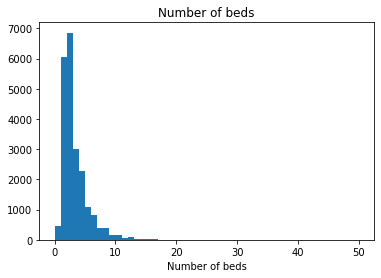

In [114]:
plt.figure()
plt.hist(new_listing.beds, bins=50)
plt.xlabel('Number of beds')
plt.title('Number of beds');

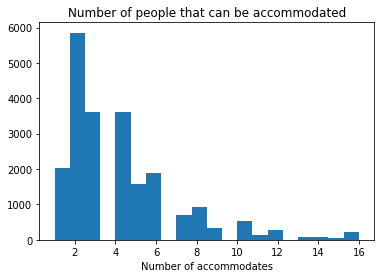

In [115]:
plt.figure()
plt.hist(new_listing.accommodates, bins=20)
plt.xlabel('Number of accommodates')
plt.title('Number of people that can be accommodated');

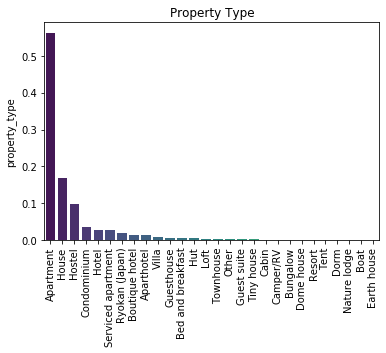

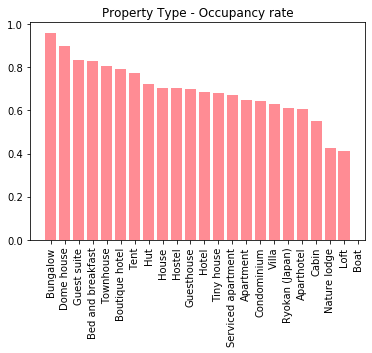

In [116]:
# property type -> new_listing.property_type
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x=new_listing.property_type.value_counts().index, y=new_listing.property_type.value_counts()
            /listing_new.shape[0], palette = 'viridis')
plt.title("Property Type")

# Create a dataframe and sort by occupacy_rate
property_type_oc = pd.DataFrame(new_listing.groupby('property_type').occupancy_rate.mean())
property_type_oc = property_type_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure()
plt.xticks(rotation=90)
plt.bar(property_type_oc.index, property_type_oc.occupancy_rate, color='#FF8C94')
plt.title("Property Type - Occupancy rate");

In [117]:
# More than 50% of properties booked in Tokyo are apartments. Its occupancy rate, although not among the highest,
# is quite high, at 70%.
# 5 most popular property types are: Bungalow, Dome house, Guest suite, Bed and breakfast, and Townhouse.

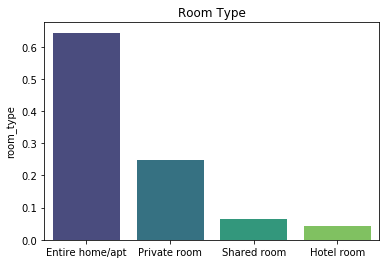

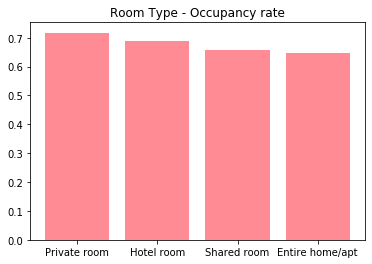

In [118]:
# room type -> new_listing.room_type
plt.figure()
sns.barplot(new_listing.room_type.value_counts().index, new_listing.room_type.value_counts()
            /listing_new.shape[0], palette = 'viridis')
plt.title("Room Type")

# Create a dataframe and sort by occupacy_rate
room_type_oc = pd.DataFrame(new_listing.groupby('room_type').occupancy_rate.mean())
room_type_oc = room_type_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure()
plt.bar(room_type_oc.index, room_type_oc.occupancy_rate, color='#FF8C94')
plt.title("Room Type - Occupancy rate");

In [119]:
# Most Airbnb listings in Tokyo are Entire home/apartment; its occupancy is the lowest, at only 65%.
# This is easily understandable due to entire home/apt are more expensive than private room listings (see graph below)
# Interestingly, although private room is the second most popular room type on Airbnb in Tokyo, it has the 
# highest occupancy rate of approximately 73%.

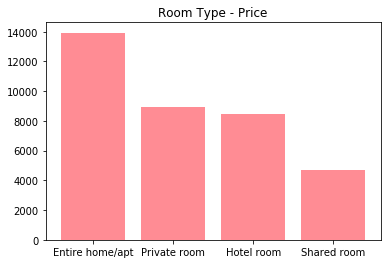

In [120]:
# Create a room type dataframe and sort by price 
room_type_p = pd.DataFrame(new_listing.groupby('room_type').price.mean())
room_type_p = room_type_p.sort_values(by=['price'], ascending=False)
plt.figure()
plt.bar(room_type_p.index, room_type_p.price, color='#FF8C94')
plt.title("Room Type - Price");

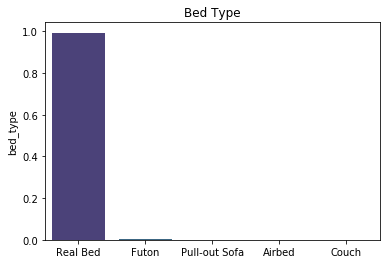

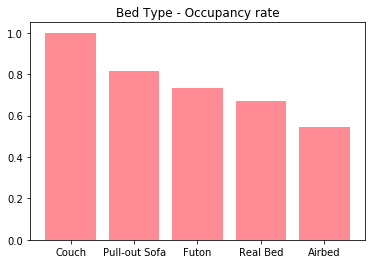

In [121]:
# bed type -> new_listing.bed_type

plt.figure()
sns.barplot(new_listing.bed_type.value_counts().index, new_listing.bed_type.value_counts()
            /listing_new.shape[0], palette = 'viridis')
plt.title("Bed Type")

# Create a dataframe and sort by occupacy_rate
bed_type_oc = pd.DataFrame(new_listing.groupby('bed_type').occupancy_rate.mean())
bed_type_oc = bed_type_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure()
plt.bar(bed_type_oc.index, bed_type_oc.occupancy_rate, color='#FF8C94')
plt.title("Bed Type - Occupancy rate");

In [122]:
# The majority of listings have real beds as bed types. However the occupancy for real beds is the second lowest,
# at only 70%. Whereas couch bed type, pull-out sofa and futon are the more popular types of beds booked.

In [123]:
new_listing.bed_type.value_counts()

Real Bed         21772
Futon              107
Pull-out Sofa       12
Airbed               8
Couch                2
Name: bed_type, dtype: int64

In [124]:
# Q3: Which district is the most popular?

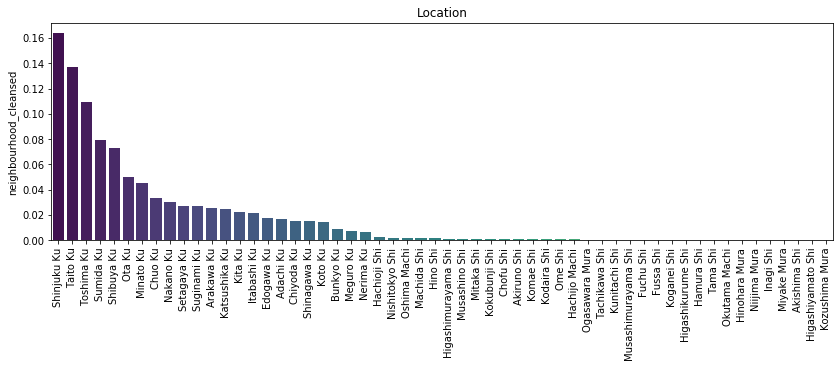

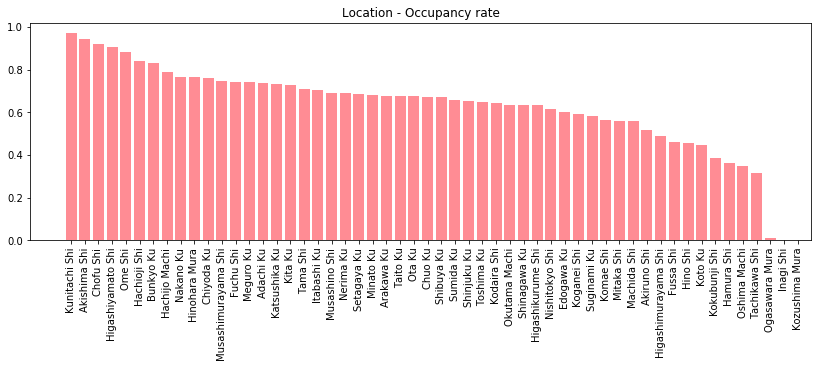

In [125]:
# location -> listing.neighbourhood_cleansed

plt.figure(figsize=(14, 4))
plt.xticks(rotation=90)
sns.barplot(new_listing.neighbourhood_cleansed.value_counts().index,new_listing.neighbourhood_cleansed.value_counts()
            /listing_new.shape[0], palette = 'viridis')
plt.title("Location")

# Create a dataframe and sort by occupacy_rate
neighbourhood_cleansed_oc = pd.DataFrame(new_listing.groupby('neighbourhood_cleansed').occupancy_rate.mean())
neighbourhood_cleansed_oc = neighbourhood_cleansed_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure(figsize=(14, 4))
plt.xticks(rotation=90)
plt.bar(neighbourhood_cleansed_oc.index, neighbourhood_cleansed_oc.occupancy_rate, color='#FF8C94')
plt.title("Location - Occupancy rate");

In [126]:
# Although most listings are located in the Top 24 wards (ending in 'Ku') of Japan (high central locations), 
# locations with the highest occupancy rates are suburban cities outside of Tokyo (ending in 'Shi').
# This could be due to prices of listings are higher within Tokyo.

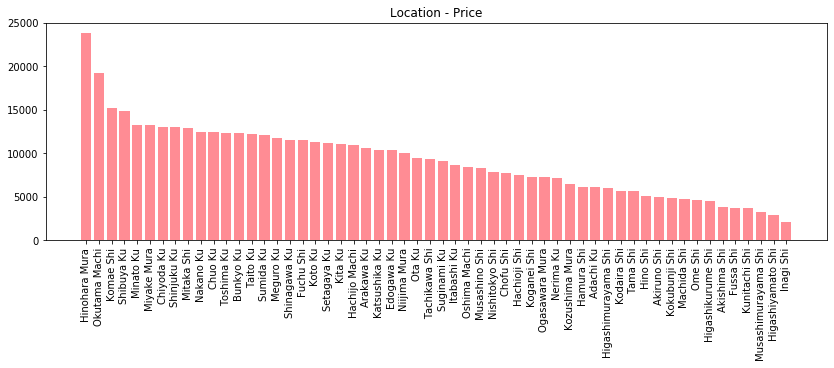

In [127]:
# Create a location dataframe and sort by price
neighbourhood_cleansed_p = pd.DataFrame(new_listing.groupby('neighbourhood_cleansed').price.mean())
neighbourhood_cleansed_p = neighbourhood_cleansed_p.sort_values(by=['price'], ascending=False)
plt.figure(figsize=(14, 4))
plt.xticks(rotation=90)
plt.bar(neighbourhood_cleansed_p.index, neighbourhood_cleansed_p.price, color='#FF8C94')
plt.title("Location - Price");

In [128]:
# From the above graph, we can confirm that prices within the wards of Tokyo are more expensive than the suburb
# From the above graph, we can confirm that prices within the wards of Tokyo are more expensive than the suburban cities
# adjacent to Tokyo. 

In [129]:
# I'm interested in learning the distance between the Airbnb neighbourhoods and Olympic venues.
# To do this, I first need to web scrape Olympic venue data from the official Olympics website, then organize it
# into a dataframe.

In [130]:
olympics = pd.read_html("https://www.jrailpass.com/blog/tokyo-2020-olympics/venues", header=0)[0]
olympics

,Venue,Sport,Nearest station
0,Olympic Stadium (New National Stadium),Opening / Closing ceremonies Athletics Football,Sendagaya Station (Chuo-Sobu line)
1,Tokyo Metropolitan Gymnasium,Table Tennis,Sendagaya Station (Chuo-Sobu line)
2,Yoyogi National Stadium,Handball,Harajuku station (Yamanote Line)
3,Nippon Budokan,Judo Karate,"Kundashita station (Tokyo Metro, Toei Subway)"
4,Imperial Palace Garden,Athletics (Marathon and Race Walk),Moved to Sapporo
5,Tokyo International Forum,Weightlifting,"Yurakucho station, Tokyo station (Yamanote line)"
6,Kokugikan Arena,Boxing,Ryogoku station (Chuo-Sabu line)
7,Equestrian Park,"Equestrian (Dressage, Eventing, Jumping)",Chitose-Funabashi station (Odakyu line)
8,Musashino Forest Sport Plaza,Badminton Modern Pentathlon (Fencing),Tobitakyu station (Keio Line)
9,Tokyo Stadium (Ajinomoto),"Football Rugby Modern Pentathlon (Swimming, Fe...",Tobitakyu station (Keio Line)


NameError: name 'soup' is not defined

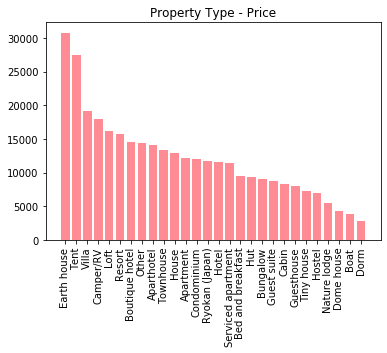

In [132]:
# View property_type by price:
property_type_p = pd.DataFrame(new_listing.groupby('property_type').price.mean())
property_type_p = property_type_p.sort_values(by=['price'], ascending=False)
plt.figure()
plt.xticks(rotation=90)
plt.bar(property_type_p.index, property_type_p.price, color='#FF8C94')
plt.title("Property Type - Price");

In [133]:
# Q4. Average price per person
listing_new['price_pp'] = listing_new.price/listing_new.accommodates
print('The average price per person is {} yen.'.format(round(listing_new['price_pp'].mean())))

The average price per person is 3362 yen.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
# Q5. Predict prices by other parameters:

In [135]:
# Rename 'id' variable in listing to 'listing_id'
listing_new = listing_new.rename(index=str, columns={"id": "listing_id"})

In [136]:
# Merge listing dataframe and 'month' in calendar dataframe
# Create a column that holds month data in calendar dataframe
new_calendar['month'] = new_calendar.date.dt.month
df_calendar = new_calendar.drop(['date','available','adjusted_price','price'], axis=1)
df_listing = listing_new.drop(['minimum_nights','maximum_nights'], axis=1)

# Merge calendar and listing data onmerge
df_new = pd.merge(df_calendar, df_listing, on = 'listing_id')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


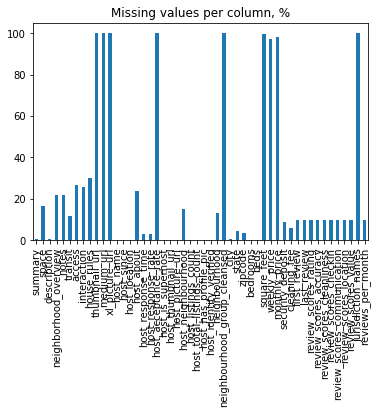

In [137]:
# Check missing values
listings_missing_df = df_new.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %');

In [138]:
# Continue to drop columns that are not needed to the analysis 
# Previously dropped columns are = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 
                     #'neighbourhood_group_cleansed', 'jurisdiction_names', 'square_feet', 'weekly_price', 
                     #'monthly_price', 'house_rules', 'host_about', 'access', 'interaction', 'notes', 
                     #'neighborhood_overview', 'transit', 'host_neighbourhood', 'space'] 
# I keep 'zipcode', 'longitude', 'latitude', 'is_location_exact' for future locations analysis.
columns_to_drop = ['host_since','thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','neighbourhood_group_cleansed',
'square_feet','weekly_price','monthly_price','jurisdiction_names','listing_id','listing_url','scrape_id','last_scraped','name','summary','space',
'description','experiences_offered','neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url','medium_url',
'picture_url','xl_picture_url','host_id','host_url','host_name','host_location','host_about','host_thumbnail_url',
'host_picture_url','neighbourhood','street','host_neighbourhood','host_verifications','smart_location','state','city',
'zipcode','market','country_code','country','latitude','longitude','is_location_exact','amenities','calendar_updated',
'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
'calendar_last_scraped','first_review','last_review','license','cancellation_policy','require_guest_profile_picture',
'require_guest_phone_verification','price_pp','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

In [139]:
df_new_clean = df_new.drop(columns_to_drop, axis=1)

In [140]:
# Drop all the rows that have missing data
df_new_clean.dropna(inplace=True)

In [141]:
# Categorical variables -> host_response_time, host_is_superhost, host_has_profile_pic, host_identity_verified, neighbourhood_cleansed, 
# property_type, room_type, bed_type, has_availability, instant_bookable, is_business_travel_ready, 

# Numerical variables -> host_response_rate, host_listings_count, host_total_listings_count, accommodates, bathrooms, 
# bedrooms, beds, security_deposit, cleaning_fee, guests_included, minimum_nights, maximum_nights, availability_30, 
# availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, review_scores_rating, 
# review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, 
# review_scores_value, reviews_per_month

# Change 'object' datatype to numeric -> host_response_rate, security_deposit, cleaning_fee, extra_people
df_new_clean["host_response_rate"] = df_new_clean["host_response_rate"].str.replace("%", "")
df_new_clean["security_deposit"] = df_new_clean["security_deposit"].str.replace("[$, ]", "")
df_new_clean["cleaning_fee"] = df_new_clean["cleaning_fee"].str.replace("[$, ]", "")
df_new_clean["extra_people"] = df_new_clean["extra_people"].str.replace("[$, ]", "")
df_new_clean = df_new_clean.astype({'host_response_rate': float, 'security_deposit': float, 'cleaning_fee': float, 'extra_people': float})

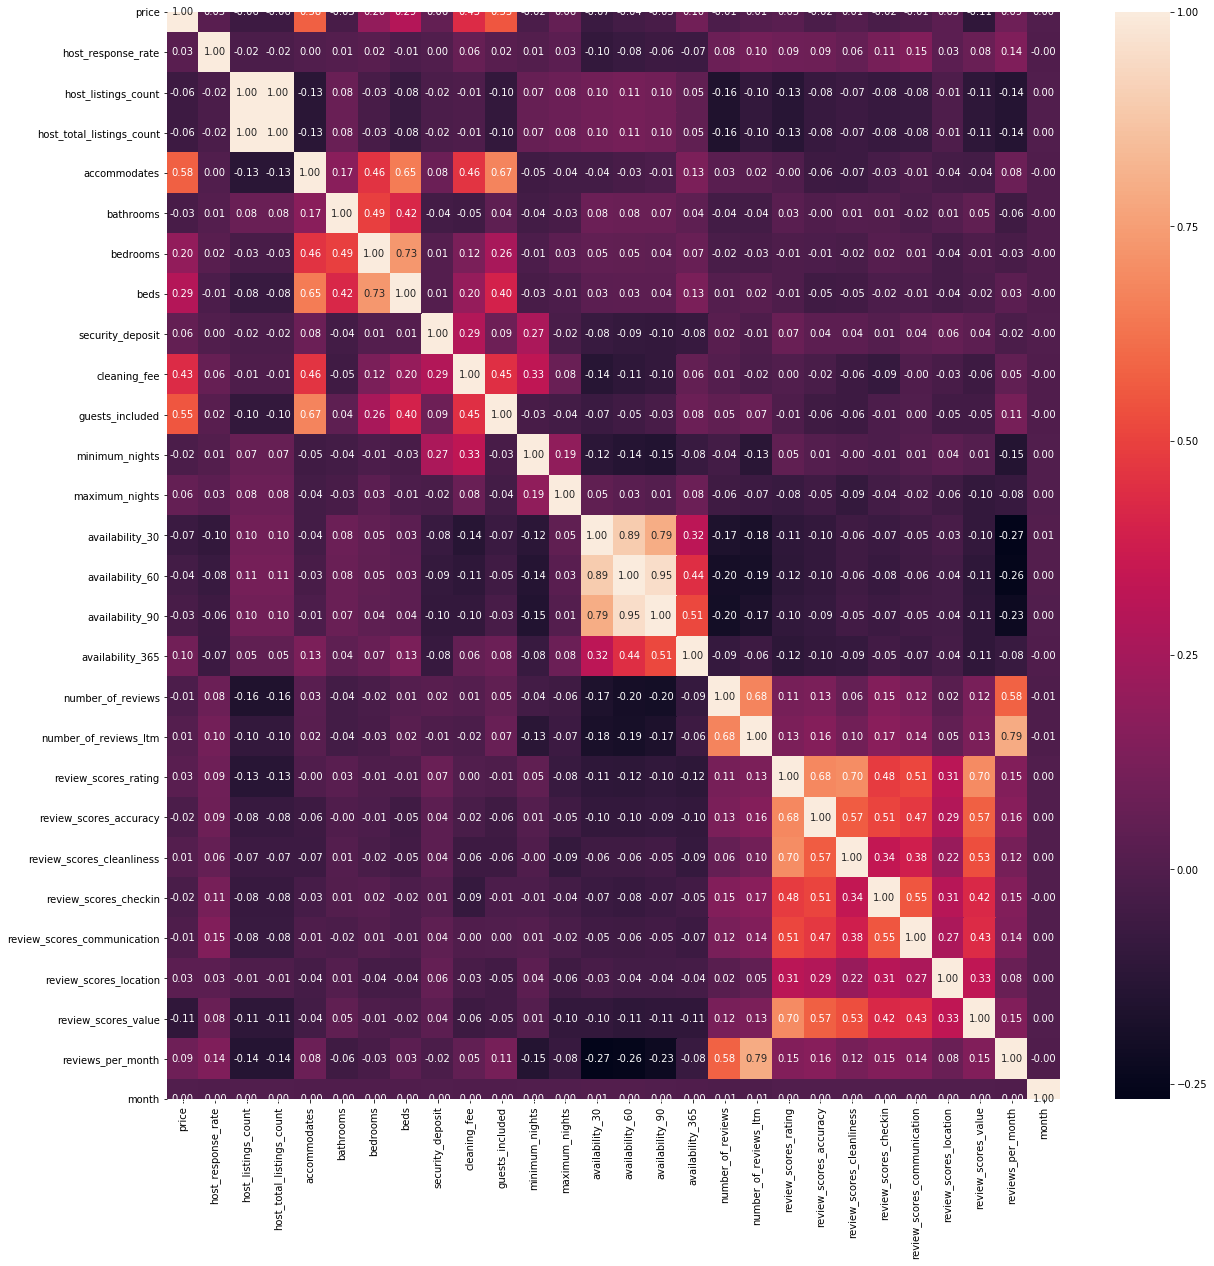

In [142]:
# numerical variables to find out the correlations
cols = ['price', 'host_response_rate','host_listings_count','host_total_listings_count','accommodates','bathrooms',
        'bedrooms', 'beds', 'security_deposit','cleaning_fee','guests_included','minimum_nights',
        'maximum_nights','availability_30', 'availability_60','availability_90','availability_365',
        'number_of_reviews','number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location',
        'review_scores_value', 'reviews_per_month', 'month']
plt.figure(figsize=(20,20))
sns.heatmap(df_new_clean[cols].corr(), annot=True, fmt='.2f');

In [143]:
#Pull a list of the column names of the categorical variables
cat_df = df_new_clean.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

In [144]:
# One-Hot Encoding - Convert Categorical variables into numerical representation without arbitrary ordering
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_new_clean_cat = create_dummy_df(df_new_clean, cat_cols_lst, dummy_na=False)
df_new_clean_cat.iloc[:,5:].head(5)

,month,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t
0,3,70.0,2.0,2.0,2,1.0,1.0,1.0,4288.0,32985.0,...,0,0,0,0,0,0,0,0,1,1
1,3,100.0,2.0,2.0,2,1.0,1.0,1.0,4270.0,32843.0,...,0,0,0,0,0,0,0,0,1,1
2,3,70.0,2.0,2.0,2,1.0,1.0,1.0,4288.0,32985.0,...,0,0,0,0,0,0,0,0,1,1
3,3,100.0,2.0,2.0,2,1.0,1.0,1.0,4270.0,32843.0,...,0,0,0,0,0,0,0,0,1,1
4,3,70.0,2.0,2.0,2,1.0,1.0,1.0,4288.0,32985.0,...,0,0,0,0,0,0,0,0,1,1


In [145]:
df_new_clean_cat.shape[0]

2347472

In [146]:
# Convert numerical data into array:
# Labels are the values we want to predict
labels = np.array(df_new_clean_cat['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features = df_new_clean_cat.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [147]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
test_size = 0.3, stratify = labels, random_state = 42, shuffle = True)

In [148]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643230, 112)
Training Labels Shape: (1643230,)
Testing Features Shape: (704242, 112)
Testing Labels Shape: (704242,)


In [149]:
# Establish baseline
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('review_scores_location')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  11456.75


In [150]:
# Train ML model by only numerical columns, with Random Forest
forest = RandomForestRegressor(n_estimators=4, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest = forest.fit(train_features, train_labels.squeeze())

In [155]:
# Calculate scores for the model
train_labels_pred = forest.predict(train_features)
test_labels_pred = forest.predict(test_features)

# Calculate the absolute errors
errors_train = abs(train_labels_pred - train_labels)
errors_test = abs(test_labels_pred - test_labels)

# Print out the mean absolute error (MAE), to compare to baseline
print('Mean Absolute Error, train: %.4f, test: %.4f' % (
        round(np.mean(errors_train)),
        round(np.mean(errors_test))))

# Print out the mean squared error (MSE)
print('MSE train: %.4f, test: %.4f' % (
        mean_squared_error(train_labels, train_labels_pred),
        mean_squared_error(test_labels, test_labels_pred)))

# Print out the R-squared value (R²)
print('R^2 train: %.4f, test: %.4f' % (
        r2_score(train_labels, train_labels_pred),
        r2_score(test_labels, test_labels_pred)))

Mean Absolute Error, train: 0.0000, test: 0.0000
MSE train: 101.5898, test: 548.6544
R^2 train: 1.0000, test: 1.0000


In [156]:
# Extract feature importances (fi)
from sklearn.feature_selection import SelectFromModel
for feature in zip(feature_list, forest.feature_importances_):
    print(feature)

('minimum_nights', 0.009464591939498083)
('maximum_nights', 0.05703415509095843)
('available_t', 0.0)
('available_f', 9.463910038703035e-09)
('available_total', 0.0)
('month', 0.0)
('host_response_rate', 0.005632558799275919)
('host_listings_count', 0.020630461885489792)
('host_total_listings_count', 0.01712160579893108)
('accommodates', 0.3142297767595286)
('bathrooms', 0.011577123690254317)
('bedrooms', 0.0055495587902716775)
('beds', 0.008437159623094836)
('security_deposit', 0.022862165030550937)
('cleaning_fee', 0.12299013912700353)
('guests_included', 0.06975397815850722)
('extra_people', 0.04026644938224869)
('availability_30', 0.007459172673564363)
('availability_60', 0.01110947538798865)
('availability_90', 0.008484078397989588)
('availability_365', 0.01975789413651756)
('number_of_reviews', 0.019988309209588908)
('number_of_reviews_ltm', 0.008408171326996805)
('review_scores_rating', 0.013806004350574906)
('review_scores_accuracy', 0.004050144851498756)
('review_scores_cleanl

In [158]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(forest, threshold=0.15)

# Train the selector
sfm.fit(train_features, train_labels)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feature_list[feature_list_index])

accommodates


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets